# Number of Clusters

This experiment has the purpose of defining the number of clusters presented in the data. For that, we use the t-SNE for the projection of the data (dimensionality reduction), and an error metric to determine the best number of clusters. The metrics used are: square of the 2-norm distance metric, silhouette score and Davies-Bouldin Index.

In this notebook we employed the **square of the 2-norm distance**. This metric computes the mean distance of every point to its cluster.

Metrics such as adjusted rand index, mutual information based scores, homogeneity, completeness and V-measure can not be used in this work because they require the ground truth (true labels) of the data.

In [1]:
import sys
sys.path.append('../')
from src import reader as r
from src import visualization as v

In [2]:
import numpy as np
import sklearn
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.metrics import silhouette_score

In [3]:
X = r.readBOW()
print(X.head(10))
print(X.shape)

['health.txt', 'bags.csv', 'word2vec.csv']
     0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9   ...    0.1185  0.1186  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   ...       0.0     0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   ...       0.0     0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   ...       0.0     0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   ...       0.0     0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   ...       0.0     0.0   
5  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   ...       0.0     0.0   
6  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   ...       0.0     0.0   
7  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   ...       0.0     0.0   
8  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   ...       0.0     0.0   
9  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   ...       0.0     0.0   

   0.1187  0.1188  0.1189  0.1190  0.1191    0.1192  0.1193  0.1194  
0     0.0     0.0

In [42]:
from MulticoreTSNE import MulticoreTSNE as TSNE

smp_sz = 7000
tsne_bow = TSNE(n_components=2, perplexity=500, verbose=True)
tsne_bow_result = tsne_bow.fit_transform(X[:smp_sz])

## Elbow Method --- K-means++
This methods aims to define the best number of clusters (K) by the cost function J computed during the K-means.

In [53]:
error = 0
Ks = []
Js = []
Epsilon = 1e-2
it = 1
J = 0.

k = 2
print("###############################")
while ((error > Epsilon) or (it == 1)):
    print("Number of Clusters:",k)
    print("Starting K-means++")
    cluster = KMeans(n_clusters=k,random_state=42,n_jobs=-1)
    cluster_result = cluster.fit(X)
    print("Finished")
    error = J
    J = cluster_result.inertia_ / X.shape[0]        
    print("J =",J)
    error = abs(error-J)  
    Ks.append(k)
    print("error =",error)
    Js.append(J)
    k += 10
    it += 1
    print("###############################")
    
best_K = k-10
print("\nBest k:",best_K)
print("Number of iterations:",it)

###############################
Number of Clusters: 2
Starting K-means++
Finished
J = 0.9719530554536893
error = 0.9719530554536893
###############################
Number of Clusters: 12
Starting K-means++
Finished
J = 0.9277470310959371
error = 0.044206024357752116
###############################
Number of Clusters: 22
Starting K-means++
Finished
J = 0.9054224904026851
error = 0.02232454069325207
###############################
Number of Clusters: 32
Starting K-means++
Finished
J = 0.8907341105320232
error = 0.01468837987066185
###############################
Number of Clusters: 42
Starting K-means++
Finished
J = 0.8710862959035125
error = 0.01964781462851073
###############################
Number of Clusters: 52
Starting K-means++
Finished
J = 0.8580606415765727
error = 0.013025654326939806
###############################
Number of Clusters: 62
Starting K-means++
Finished
J = 0.8441393064067997
error = 0.013921335169773008
###############################
Number of Clusters: 72
Starti

J  [0.9719530554536893, 0.044206024357752116, 0.02232454069325207, 0.01468837987066185, 0.01964781462851073, 0.013025654326939806, 0.013921335169773008, 0.0070541792843564766]
Ks  [2, 12, 22, 32, 42, 52, 62, 72]


<module 'matplotlib.pyplot' from '/home/azael/Trabalhos/MO444/MO444/lib/python3.5/site-packages/matplotlib/pyplot.py'>

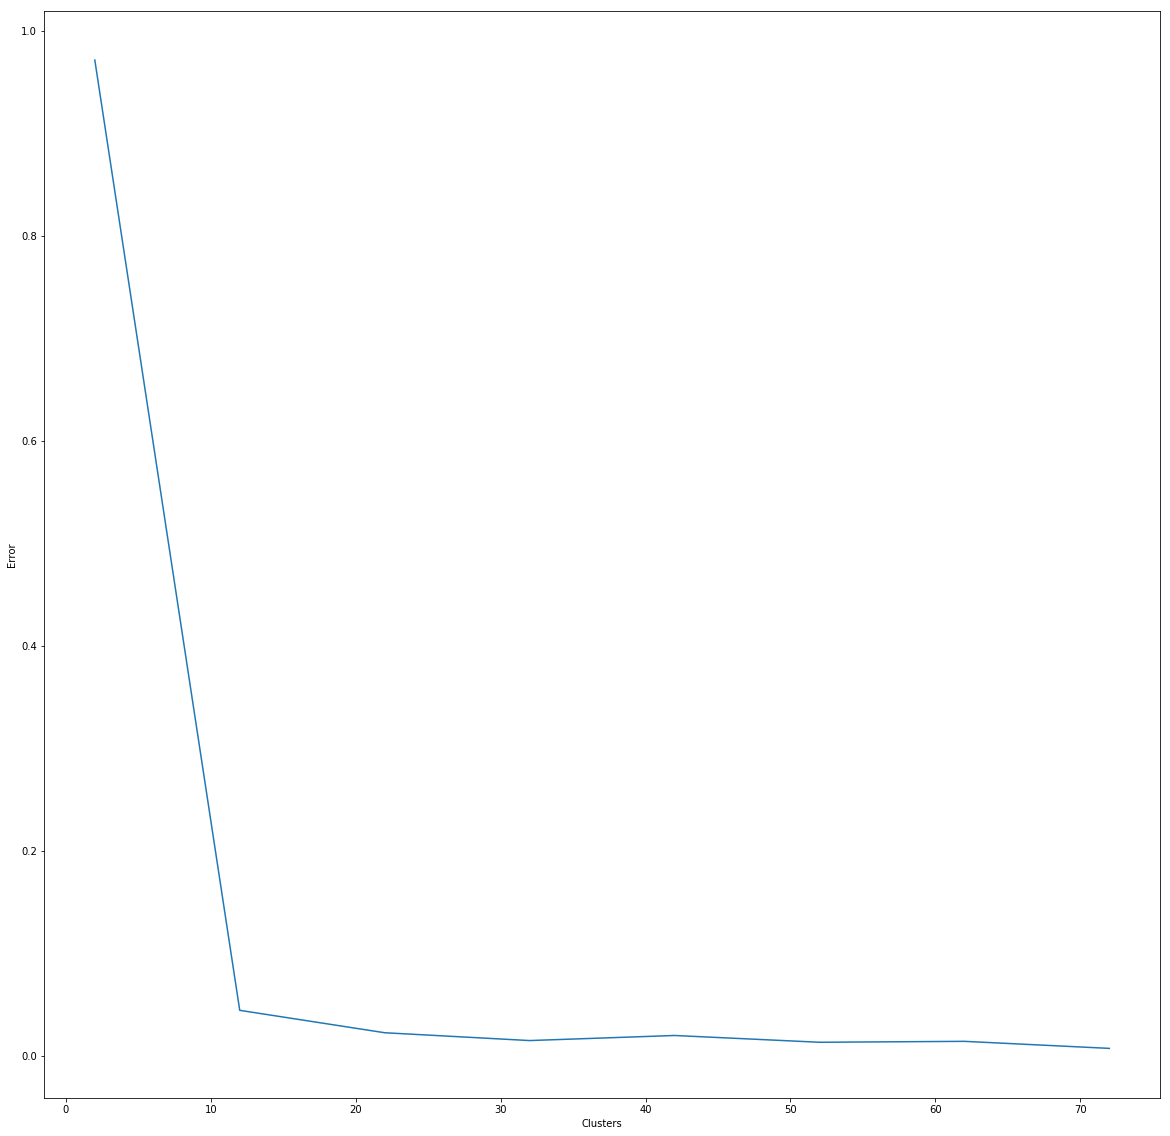

In [57]:
v.plot_cluster_errors(Ks,Js)

After analysing the elbow curve, we conclude that the best number of clusters (K) is 52.

In [54]:
print("#############################")
print("Best K =", best_K)
print("Applying K-means")
best_cluster = KMeans(n_clusters=best_K)
best_cluster_result = best_cluster.fit(X)
print("Finished")
print("#############################")

#############################
Best K = 72
Applying K-means
Finished
#############################


In [55]:
true_label = best_cluster_result.labels_

<module 'matplotlib.pyplot' from '/home/azael/Trabalhos/MO444/MO444/lib/python3.5/site-packages/matplotlib/pyplot.py'>

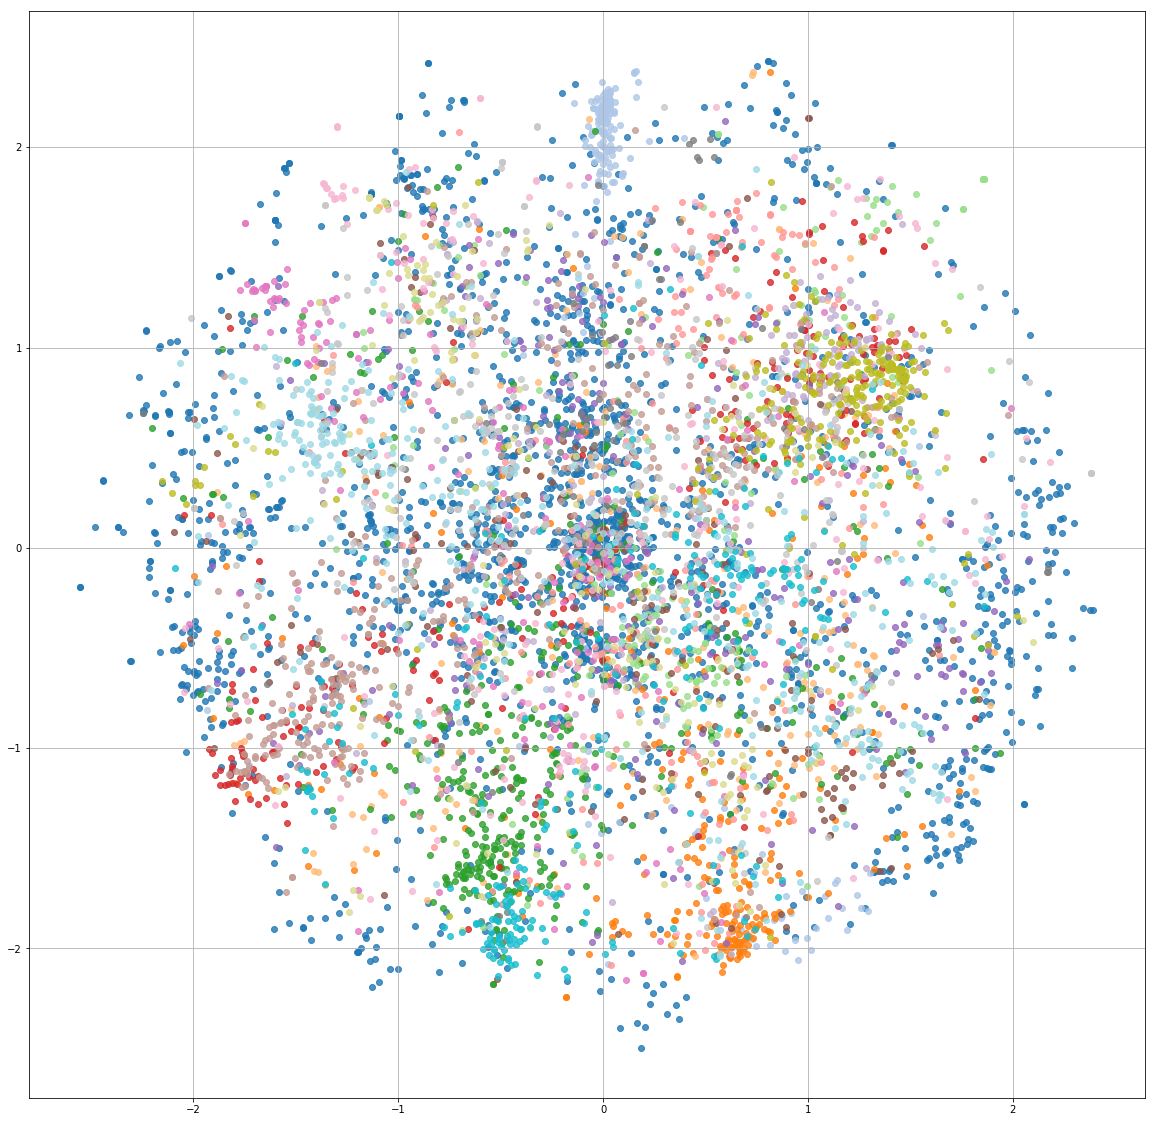

In [56]:
v.visualize_sup_scatter(tsne_bow_result, true_label[:smp_sz])

## DBSCAN
In this section we aim to define the best number of clusters (K), but this time by means of the Density-Based Spatial Clustering of Applications with Noise (DBSCAN). The DBSCAN use a proximity and density primitives to determine if a datapoint belongs to an existing cluster or if another one should be created.

In [40]:
dbscan = DBSCAN(eps=0.9,min_samples=2)
y = dbscan.fit_predict(X)

Number of clusters 772


<module 'matplotlib.pyplot' from '/home/azael/Trabalhos/MO444/MO444/lib/python3.5/site-packages/matplotlib/pyplot.py'>

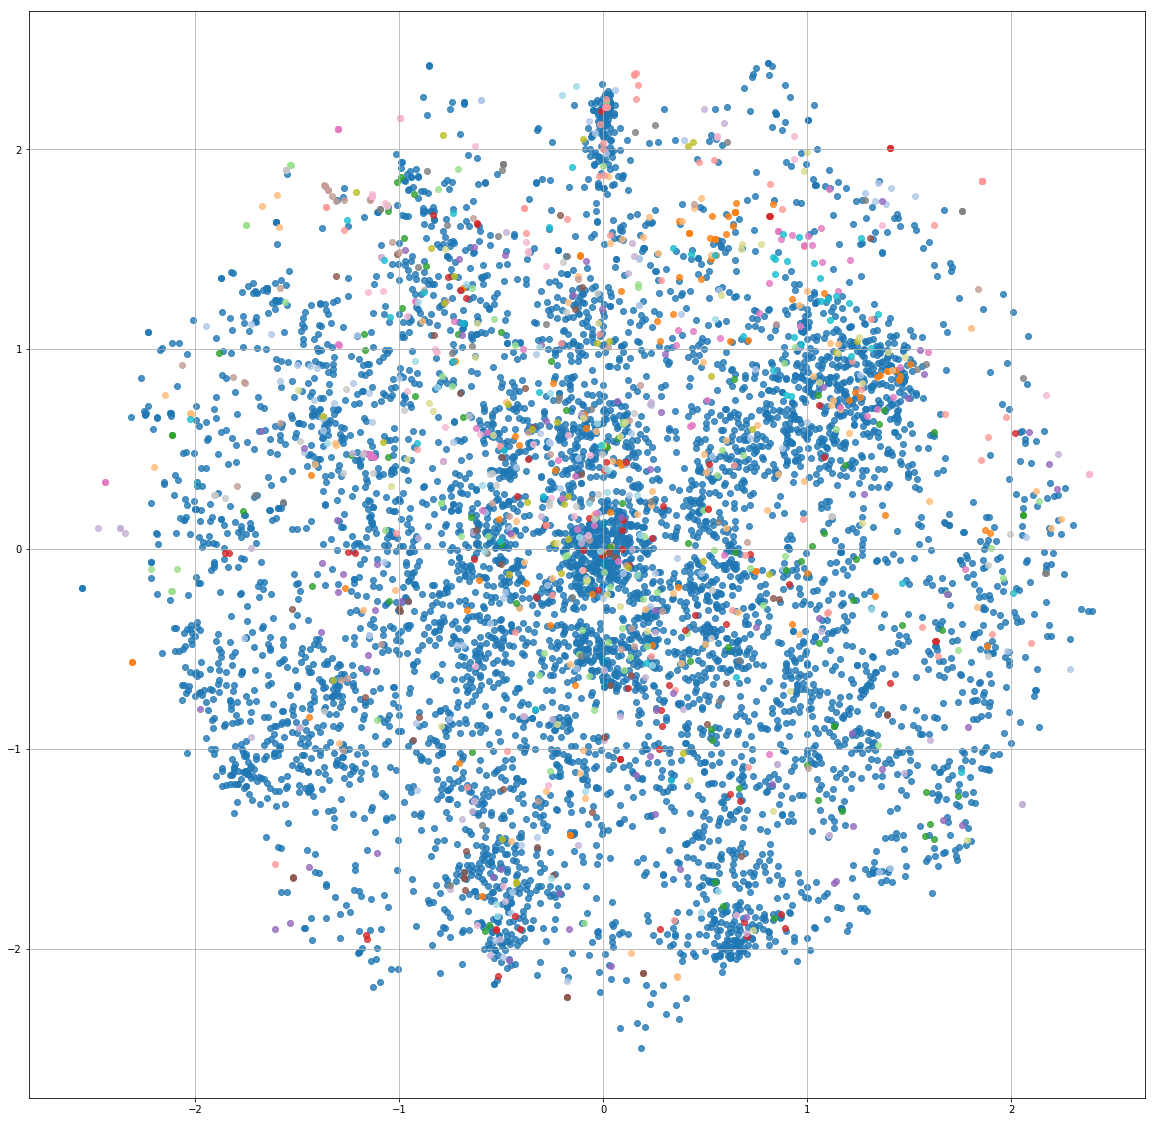

In [44]:
print("Number of clusters",len(np.unique(y)))
v.visualize_sup_scatter(tsne_bow_result, y[:smp_sz])